In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import pysimpactcyan
# simpact = pysimpactcyan.PySimpactCyan()
# from psimapacthelper import *
from calibration_wrapper_function_revised import calibration_wrapper_function
import pyabc
from pyabc.sampler import SingleCoreSampler
import os
import tempfile

In [2]:
# the parameters need to be named and not just passed as a vector
prior = pyabc.Distribution(hivtransmission_param_f1=pyabc.RV("uniform", 1, 1.5),
                           formation_hazard_agegapry_gap_agescale_man_woman=pyabc.RV("uniform", 0, 0.5),
                           person_agegap_man_woman_dist_normal_mu=pyabc.RV("uniform", -3, 3),
                           person_agegap_man_woman_dist_normal_sigma=pyabc.RV("uniform", 1, 5),
                           person_eagerness_man_woman_dist_gamma_a=pyabc.RV("uniform", 0, 1.5),
                           person_eagerness_man_woman_dist_gamma_b=pyabc.RV("uniform", 0, 80),
                           # formation_hazard_agegapry_gap_factor_man_woman_exp=pyabc.RV("uniform", -0.7, 0),
                           # formation_hazard_agegapry_baseline=pyabc.RV("uniform", 4, 6),
                           formation_hazard_agegapry_numrel_man_woman=pyabc.RV("uniform", -1, 1),
                           dissolution_alpha_0=pyabc.RV("uniform", -2, 1),
                           conception_alpha_base=pyabc.RV("uniform", -3, 1),
                           diagnosis_baseline_t0=pyabc.RV("uniform", -7, 1),
                           diagnosis_baseline_t1=pyabc.RV("uniform", 0, 4),
                           diagnosis_baseline_t2=pyabc.RV("uniform", 0, 4),
                           diagnosis_baseline_t3=pyabc.RV("uniform", 0, 4),
                           diagnosis_baseline_t4=pyabc.RV("uniform", -2, 2)
                           )

In [3]:
prior.get_parameter_names()

['conception_alpha_base',
 'diagnosis_baseline_t0',
 'diagnosis_baseline_t1',
 'diagnosis_baseline_t2',
 'diagnosis_baseline_t3',
 'diagnosis_baseline_t4',
 'dissolution_alpha_0',
 'formation_hazard_agegapry_gap_agescale_man_woman',
 'formation_hazard_agegapry_numrel_man_woman',
 'hivtransmission_param_f1',
 'person_agegap_man_woman_dist_normal_mu',
 'person_agegap_man_woman_dist_normal_sigma',
 'person_eagerness_man_woman_dist_gamma_a',
 'person_eagerness_man_woman_dist_gamma_b']

In [6]:
# We also need to specify a distance function, measuring closeness of simulated and observed data. We just take the absolute value of the difference here.
def distance(x, x0):
    return abs(x["growthrate"] - x0["growthrate"])

In [7]:
# using non adaptive distance
# First, we consider a non-adaptive Euclidean distance with uniform weights
distance = pyabc.PNormDistance(p=2) #weighted normal distance, works well if you have more than 1 targets

In [8]:
# Adaptive distance
scale_log_file = tempfile.mkstemp(suffix=".json")[1]

distance_adaptive = pyabc.AdaptivePNormDistance(
    p=2,
    scale_function=pyabc.distance.mad,  # method by which to scale
    scale_log_file=scale_log_file,
)

In [4]:
import numpy as np
def weighted_distance(x, x_0):
    
    weights = {"growthrate_35": 1,
                'prev_f_25_15_19': 10,
                'prev_m_25_15_19': 10,
                'prev_f_39_15_19': 10,
                'prev_m_39_15_19': 10,
                'prev_f_25_20_24': 10,
                'prev_m_25_20_24': 10,
                'prev_f_39_20_24': 10,
                'prev_m_39_20_24': 10,
                'prev_f_25_25_29': 10,
                'prev_m_25_25_29': 10,
                'prev_f_39_25_29': 10,
                'prev_m_39_25_29': 10,
                'prev_f_25_30_34': 10,
                'prev_m_25_30_34': 10,
                'prev_f_39_30_34': 10,
                'prev_m_39_30_34': 10,
                'prev_f_25_35_39': 10,
                'prev_m_25_35_39': 10,
                'prev_f_39_35_39': 10,
                'prev_m_39_35_39': 10,
                'prev_f_25_40_44': 10,
                'prev_m_25_40_44': 10,
                'prev_f_39_40_44': 10,
                'prev_m_39_40_44': 10,
                'prev_f_25_45_49': 10,
                'prev_m_25_45_49': 10,
                'prev_f_39_45_49': 10,
                'prev_m_39_45_49': 10,
                'art_cov_t_25.5': 1,
                'art_cov_t_30.5': 1,
                'art_cov_t_35.5': 1,
                'art_cov_t_38.5': 1,
                "vl_suppr_39" : 0.5,
                "vmmc_15_49": 1,
                "vmmc_15_24": 1,
                "condom_15_49": 0.5,
                'inc_f_25_15_19': 10,
                'inc_m_25_15_19': 10,
                'inc_f_39_15_19': 10,
                'inc_m_39_15_19': 10,
                'inc_f_25_20_24': 10,
                'inc_m_25_20_24': 10,
                'inc_f_39_20_24': 10,
                'inc_m_39_20_24': 10,
                'inc_f_25_25_29': 10,
                'inc_m_25_25_29': 10,
                'inc_f_39_25_29': 10,
                'inc_m_39_25_29': 10,
                'inc_f_25_30_34': 10,
                'inc_m_25_30_34': 10,
                'inc_f_39_30_34': 10,
                'inc_m_39_30_34': 10,
                'inc_f_25_35_39': 10,
                'inc_m_25_35_39': 10,
                'inc_f_39_35_39': 10,
                'inc_m_39_35_39': 10,
                'inc_f_25_40_44': 10,
                'inc_m_25_40_44': 10,
                'inc_f_39_40_44': 10,
                'inc_m_39_40_44': 10,
                'inc_f_25_45_49': 10,
                'inc_m_25_45_49': 10,
                'inc_f_39_45_49': 10,
                'inc_m_39_45_49': 10
              }

    distance = 0
    for key in x:
        distance += weights[key] * (x[key] - x_0[key]) ** 2
    return np.sqrt(distance)

In [5]:
# create ABC instance
abc = pyabc.ABCSMC(models=calibration_wrapper_function, 
                   parameter_priors=prior, 
                   distance_function=weighted_distance, 
                   sampler=SingleCoreSampler(),
                   population_size=20) #population is number of samples from prior for each iteration. default=100

In [6]:
# target stats

target_stats = {"growthrate_35": 1.011,
                'prev_f_25_15_19': 0.113,
                'prev_m_25_15_19': 0.016,
                'prev_f_39_15_19': 0.06,
                'prev_m_39_15_19': 0.035,
                'prev_f_25_20_24': 0.338,
                'prev_m_25_20_24': 0.076,
                'prev_f_39_20_24': 0.152,
                'prev_m_39_20_24': 0.044,
                'prev_f_25_25_29': 0.476,
                'prev_m_25_25_29': 0.232,
                'prev_f_39_25_29': 0.282,
                'prev_m_39_25_29': 0.074,
                'prev_f_25_30_34': 0.534,
                'prev_m_25_30_34': 0.387,
                'prev_f_39_30_34': 0.452,
                'prev_m_39_30_34': 0.131,
                'prev_f_25_35_39': 0.478,
                'prev_m_25_35_39': 0.478,
                'prev_f_39_35_39': 0.571,
                'prev_m_39_35_39': 0.253,
                'prev_f_25_40_44': 0.372,
                'prev_m_25_40_44': 0.471,
                'prev_f_39_40_44': 0.614,
                'prev_m_39_40_44': 0.39,
                'prev_f_25_45_49': 0.281,
                'prev_m_25_45_49': 0.401,
                'prev_f_39_45_49': 0.594,
                'prev_m_39_45_49': 0.484,
                'art_cov_t_25.5': 0.52,
                'art_cov_t_30.5': 0.77,
                'art_cov_t_35.5': 0.90,
                'art_cov_t_38.5': 0.98,
                "vl_suppr_39" : 0.983,
                "vmmc_15_49": 0.48,
                "vmmc_15_24": 0.7,
                "condom_15_49": 0.626,
                'inc_f_25_15_19': 0.3325,
                'inc_m_25_15_19': 0.0172,
                'inc_f_39_15_19': 0.0778,
                'inc_m_39_15_19': 0.0071,
                'inc_f_25_20_24': 0.5641,
                'inc_m_25_20_24': 0.1384,
                'inc_f_39_20_24': 0.1106,
                'inc_m_39_20_24': 0.0290,
                'inc_f_25_25_29': 0.5549,
                'inc_m_25_25_29': 0.3061,
                'inc_f_39_25_29': 0.0976,
                'inc_m_39_25_29': 0.0391,
                'inc_f_25_30_34': 0.4549,
                'inc_m_25_30_34': 0.3951,
                'inc_f_39_30_34': 0.0799,
                'inc_m_39_30_34': 0.0394,
                'inc_f_25_35_39': 0.3414,
                'inc_m_25_35_39': 0.3904,
                'inc_f_39_35_39': 0.0603,
                'inc_m_39_35_39': 0.0347,
                'inc_f_25_40_44': 0.2508,
                'inc_m_25_40_44': 0.3258,
                'inc_f_39_40_44': 0.0461,
                'inc_m_39_40_44': 0.0287,
                'inc_f_25_45_49': 0.1980,
                'inc_m_25_45_49': 0.2678,
                'inc_f_39_45_49': 0.0337,
                'inc_m_39_45_49': 0.0224
               }

In [7]:
# path to save output
db_path = os.path.join("Calibration/data", "simpact_calibration_output.db")

if os.path.exists(db_path):
    # Remove the file
    os.remove(db_path)

abc.new("sqlite:///" + db_path, target_stats)

ABC.History INFO: Start <ABCSMC id=1, start_time=2024-06-21 18:34:17>


In [ ]:
# history = abc.run(minimum_epsilon=0.1, max_nr_populations=2)
history = abc.run(minimum_epsilon = 0.01, max_nr_populations= 2) #with adaptive distance, you dont specify epsilon

In [11]:
posterior_params, weights = history.get_distribution()

In [12]:
posterior_params.reset_index(drop=False).to_csv('Calibration/data/posterior_distributions.csv')
posterior_params

name,conception_alpha_base,diagnosis_baseline_t0,diagnosis_baseline_t1,diagnosis_baseline_t2,diagnosis_baseline_t3,diagnosis_baseline_t4,dissolution_alpha_0,formation_hazard_agegapry_gap_agescale_man_woman,formation_hazard_agegapry_numrel_man_woman,hivtransmission_param_f1,person_agegap_man_woman_dist_normal_mu,person_agegap_man_woman_dist_normal_sigma,person_eagerness_man_woman_dist_gamma_a,person_eagerness_man_woman_dist_gamma_b
id,,,,,,,,,,,,,,
22,-2.699653,-6.381260,1.095632,2.575577,3.600610,-1.459093,-1.402207,0.392125,-0.741159,1.214807,-1.536435,1.973890,0.824511,32.865712
23,-2.630592,-6.671607,2.133532,3.167807,3.385600,-1.369986,-1.548206,0.428961,-0.137600,2.129779,-1.061672,4.645644,0.573436,15.289402
24,-2.556436,-6.979718,3.336799,3.961440,2.073468,-0.903055,-1.862767,0.106810,-0.303492,2.185697,-0.258879,4.193444,0.491088,4.083104
25,-2.556129,-6.104549,1.367862,3.518848,2.552784,-1.687597,-1.448130,0.411270,-0.427177,2.246547,-1.746247,2.807554,1.282573,14.669796
26,-2.731937,-6.377368,2.428860,3.811041,2.087686,-0.811981,-1.426264,0.200527,-0.094520,2.075496,-1.385797,3.551625,0.819097,61.403474
27,-2.700253,-6.636215,2.955388,3.986086,1.286374,-0.616064,-1.779426,0.402108,-0.524032,1.773058,-0.348846,2.962471,0.355471,61.211552
28,-2.358083,-6.851029,3.683209,2.519356,0.757086,-1.330815,-1.820049,0.306078,-0.680162,1.949333,-0.568299,3.196250,0.707407,8.496739
29,-2.327597,-6.674339,2.731763,3.977015,0.720250,-0.464532,-1.935977,0.301990,-0.353586,2.272261,-1.211277,2.122207,0.071406,50.600061
30,-2.416145,-6.344967,3.100303,2.597806,3.291494,-0.671966,-1.714699,0.257955,-0.849846,1.660900,-2.882217,4.942888,1.057358,39.471287


# Trials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pysimpactcyan
simpact = pysimpactcyan.PySimpactCyan()
from psimapacthelper import *
from calibration_wrapper_function_revised_Copy import calibration_wrapper_function
import pyabc
import os
import tempfile
import plotly.express as px
import math

In [36]:
cfg_list = input_params_creator(
    population_eyecap_fraction=0.2,
    population_simtime=71,  # Until 1 January 2018
    population_nummen=2000,
    population_numwomen=2000,
    population_msm="no",
    hivseed_time=8.5,
    hivseed_type="amount",
    hivseed_amount=20,  # 30,
    hivseed_age_min=20,
    hivseed_age_max=50,
    hivtransmission_param_a=-1,
    hivtransmission_param_b=-90,
    hivtransmission_param_c=0.5,
    hivtransmission_param_f1=np.log(2),
    hivtransmission_param_f2=np.log(np.log(np.sqrt(2)) / np.log(2)) / 5,
    formation_hazard_agegapry_gap_factor_man_age=-0.01,
    formation_hazard_agegapry_gap_factor_woman_age=-0.01,
    formation_hazard_agegapry_meanage=-0.025,
    formation_hazard_agegapry_gap_factor_man_const=0,
    formation_hazard_agegapry_gap_factor_woman_const=0,
    formation_hazard_agegapry_gap_factor_man_exp=-1,
    formation_hazard_agegapry_gap_factor_woman_exp=-1,
    formation_hazard_agegapry_gap_agescale_man=0.45,#0.25,
    formation_hazard_agegapry_gap_agescale_woman=0.45,#0.25,
    dissolution_alpha_4=-2,#-0.05,
    debut_debutage=15,
    conception_alpha_base=-2.7,#-2.7,
    dropout_interval_dist_type="exponential",
    person_eagerness_man_dist_gamma_a=0.65,
    person_eagerness_woman_dist_gamma_a=0.38,
    person_eagerness_man_dist_gamma_b=33.3,
    person_eagerness_woman_dist_gamma_b=26.9
)

# Initial values
mu_cd4 = 800
var_cd4 = 200 ** 2
mu_cd4_end = 20
var_cd4_end = 5

# Lognormal distribution parameters for CD4 start
cfg_list["person.cd4.start.dist.type"] = "lognormal"
cfg_list["person.cd4.start.dist.lognormal.zeta"] = math.log(mu_cd4 / math.sqrt(1 + var_cd4 / mu_cd4 ** 2))
cfg_list["person.cd4.start.dist.lognormal.sigma"] = math.sqrt(math.log(1 + var_cd4 / mu_cd4 ** 2))

# Lognormal distribution parameters for CD4 end
cfg_list["person.cd4.end.dist.type"] = "lognormal"
cfg_list["person.cd4.end.dist.lognormal.zeta"] = math.log(mu_cd4_end / math.sqrt(1 + var_cd4_end / mu_cd4_end ** 2))
cfg_list["person.cd4.end.dist.lognormal.sigma"] = math.sqrt(math.log(1 + var_cd4_end / mu_cd4_end ** 2))

# Additional configuration settings
cfg_list["formation.hazard.agegapry.baseline"] = 3.5
cfg_list["mortality.aids.survtime.C"] = 65
cfg_list["mortality.aids.survtime.k"] = -0.2
cfg_list["monitoring.fraction.log_viralload"] = 0.3

cfg_list["person.survtime.logoffset.dist.type"] = "normal"
cfg_list["person.survtime.logoffset.dist.normal.mu"] = 0
cfg_list["person.survtime.logoffset.dist.normal.sigma"] = 0.1

cfg_list["person.agegap.man.dist.type"] = "normal"
cfg_list["person.agegap.woman.dist.type"] = "normal"

cfg_list["monitoring.cd4.threshold"] = 1
cfg_list["person.art.accept.threshold.dist.fixed.value"] = 0.75
cfg_list["diagnosis.baseline"] = -99999
cfg_list["periodiclogging.interval"] = 0.25
cfg_list["dropout.interval.dist.exponential.lambda"] = 0.1

# vmmc
cfg_list["EventVMMC.enabled"] = "false"
cfg_list["EventVMMC.threshold"] = 0.5
cfg_list["EventVMMC.m_vmmcprobDist.dist.type"] = "uniform"
cfg_list["EventVMMC.m_vmmcprobDist.dist.uniform.max"] = 1
cfg_list["EventVMMC.m_vmmcprobDist.dist.uniform.min"] = 0
cfg_list["EventVMMC.m_vmmcscheduleDist.dist.type"] = "discrete.csv.twocol"
cfg_list["EventVMMC.m_vmmcscheduleDist.dist.discrete.csv.twocol.file"] = "/home/jupyter/who-aids-prop/build/python/vmmc_schedule_twocol_0.csv"

# condom
cfg_list["EventCondom.enabled"] = "false"
cfg_list["EventCondom.m_condomprobDist.dist.type"] = "uniform"
cfg_list["EventCondom.m_condomprobDist.dist.uniform.min"] = 0
cfg_list["EventCondom.m_condomprobDist.dist.uniform.max"] = 1
cfg_list["EventCondom.threshold"] = 0.8
cfg_list["hivtransmission.m_condomformationdist.dist.type"] = "discrete.csv.twocol"
cfg_list["hivtransmission.m_condomformationdist.dist.discrete.csv.twocol.file"] = "/home/jupyter/who-aids-prop/build/python/relationship_condom_use_1.csv"
cfg_list["hivtransmission.m_condomformationdist.dist.discrete.csv.twocol.floor"] = "yes"
cfg_list["hivtransmission.threshold"] = 0.3

# prep
cfg_list["EventPrep.enabled"] = "false"
cfg_list["EventPrep.threshold"] = 0.5

# ART introduction configurations
art_intro = {
    "time": 20, #around 2005
    "diagnosis.baseline":-2,
    "monitoring.cd4.threshold": 100,
    #"formation.hazard.agegapry.baseline": cfg_list["formation.hazard.agegapry.baseline"] - 0.5
}

art_intro1 = {
    "time": 22,
    "diagnosis.baseline": -1.8,
    "monitoring.cd4.threshold": 150
}

art_intro2 = {
    "time": 23,
    "diagnosis.baseline": -1.5,
    "monitoring.cd4.threshold": 200,
    #"formation.hazard.agegapry.baseline": cfg_list["formation.hazard.agegapry.baseline"] - 1
}

art_intro3 = {
    "time": 30,
    "diagnosis.baseline": -1,
    "monitoring.cd4.threshold": 350
}

art_intro4 = {
    "time": 33.5,
    "diagnosis.baseline": -0.5,
    "monitoring.cd4.threshold": 500
}

art_intro5 = {
    "time": 36.75,
    "monitoring.cd4.threshold": 6000
}

ART_factual = [art_intro, art_intro1, art_intro2, art_intro3, art_intro4, art_intro5]

results = simpact.run(
        config=cfg_list,
        destDir='data',
        #interventionConfig=ART_factual,
        seed=123,
        #identifierFormat=f'seed {1}',
        quiet=False
    )

Using identifier 'simpact-cyan-2024-07-02-14-24-53_5083_BtyR2y5O-'
Results will be stored in directory '/home/jupyter/who-aids-prop/build/python/data'
Running simpact executable 'simpact-cyan-release' ...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 123
# Performing extra check on read configuration parameters
# WARNING: ignoring small (4.80514e-16) difference between 0.6931471805599453 and 0.693147180559945 in key hivtransmission.param.f1
# WARNING: ignoring small (2.00214e-16) difference between -0.13862943611198902 and -0.138629436111989 in key hivtransmission.param.f2
# WARNING: ignoring consistency check for config key population.agedistfile (config value is 'sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 1.0.0
# Current simulation time is 71.0016
# Number of events executed is 51041
# Started with 4000 people, ending with 3240 (difference is -760)


In [31]:
datalist = readthedata(results)

In [32]:
agegroup = [15, 50]
evaluation_timepoints = np.arange(0.5, 71.0, 1.0) # !!!! remember to change to 66 in the next round
evaluation_timepoints

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
       66.5, 67.5, 68.5, 69.5, 70.5])

In [33]:
# Define mapping from gender and timepoint to years,
gender = {
    0: 'Male',
    1: 'Female',
    'Total':'Total'}

timepoint_to_year = {timepoint: year for timepoint, year in enumerate(range(1980, 2051))}

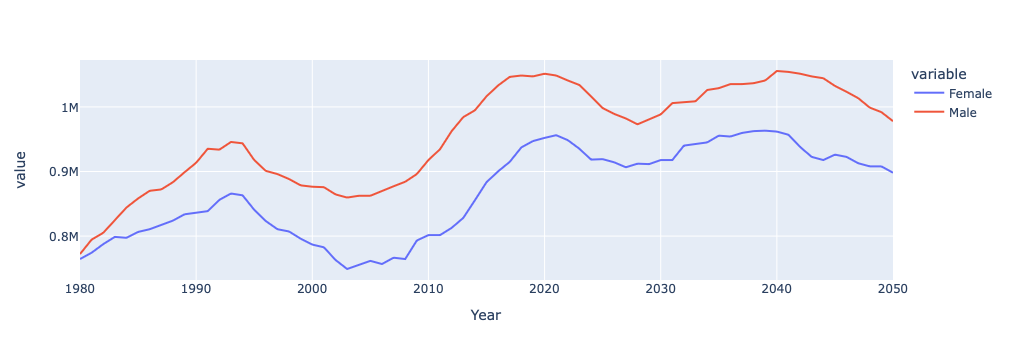

In [34]:
# Population size
dfs = []

for timepoint in evaluation_timepoints:
    agegroup = [15, 50]
    result_df = population_calculator(datalist=datalist, agegroup=agegroup,timepoint=timepoint)
    result_df['timepoint'] = timepoint - 0.5

    # Append the resulting dataframe to the list
    dfs.append(result_df)

# Concatenate all dataframes in the list into a single dataframe
pop_combined_df = pd.concat(dfs, ignore_index=True)

# Replace timepoint with years, gender with actual gender string
pop_combined_df['Year'] = pop_combined_df['timepoint'].map(timepoint_to_year)
pop_combined_df['Gender'] = pop_combined_df['Gender'].map(gender)

population_df = pop_combined_df.groupby(['Gender','Year']).agg(
            Population=('popsize', 'mean')  # Average pop for each gender
        ).reset_index()

population_df['Actual_Population'] = round(population_df['Population']*700000/1000)

population_wide_df = population_df.pivot(index='Year', columns='Gender', values='Actual_Population').reset_index()
population_wide_df.columns.name = None  # Remove the name of the columns index

px.line(data_frame=population_wide_df, x='Year', y=['Female','Male'])

/var/tmp/ipykernel_5083/3400813527.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



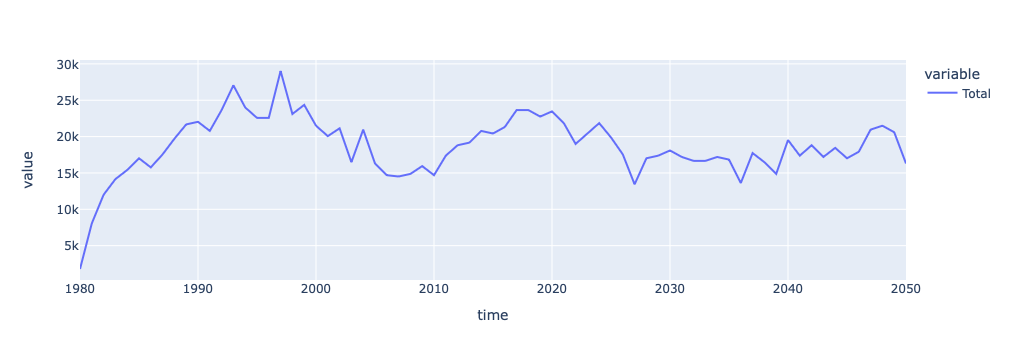

In [35]:
df = datalist['etable']
newborns = df[df.eventname == '(childborn)']
newborns['time'] = newborns['eventtime'].astype(int)

newborns_gender = newborns.groupby(['p1gender','time']).agg(no_births = ('p1ID', 'size')).reset_index()

# Replace timepoint with years, gender with actual gender string
newborns_gender['time'] = newborns_gender['time'].map(timepoint_to_year)
newborns_gender['p1gender'] = newborns_gender['p1gender'].map(gender)

newborns_gender['no_births_actual'] = newborns_gender['no_births']*716540/4000

newborns_gender_wide_df = newborns_gender.pivot(index='time', columns='p1gender', values='no_births_actual').reset_index()
newborns_gender_wide_df['Total'] = newborns_gender_wide_df['Female'] + newborns_gender_wide_df['Male']

px.line(data_frame=newborns_gender_wide_df, x='time', y=['Total'])

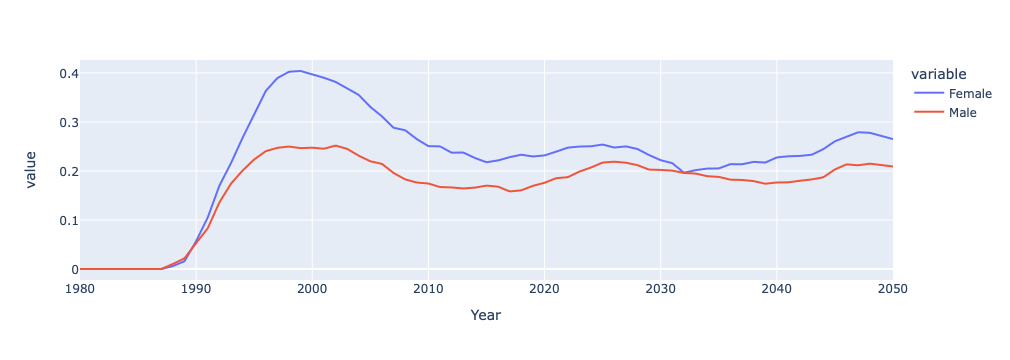

In [24]:
# Prevalence
dfs = []


for timepoint in evaluation_timepoints:
    # agegroup = [15, 50]
    result_df = prevalence_calculator(datalist=datalist, agegroup=agegroup,timepoint=timepoint)
    result_df['timepoint'] = timepoint - 0.5

    # Append the resulting dataframe to the list
    dfs.append(result_df)

# Concatenate all dataframes in the list into a single dataframe
prev_combined_df = pd.concat(dfs, ignore_index=True)

# Replace timepoint with years, gender with actual gender string
prev_combined_df['Year'] = prev_combined_df['timepoint'].map(timepoint_to_year)
prev_combined_df['Gender'] = prev_combined_df['Gender'].map(gender)

prevalence_df = prev_combined_df.groupby(['Gender','Year']).agg(
            pointprevalence=('pointprevalence', 'mean')  # Average pop for each gender
        ).reset_index()

prevalence_wide_df = prevalence_df.pivot(index='Year', columns='Gender', values='pointprevalence').reset_index()
prevalence_wide_df.columns.name = None  # Remove the name of the columns index

px.line(data_frame=prevalence_wide_df, x='Year', y=['Female','Male'])

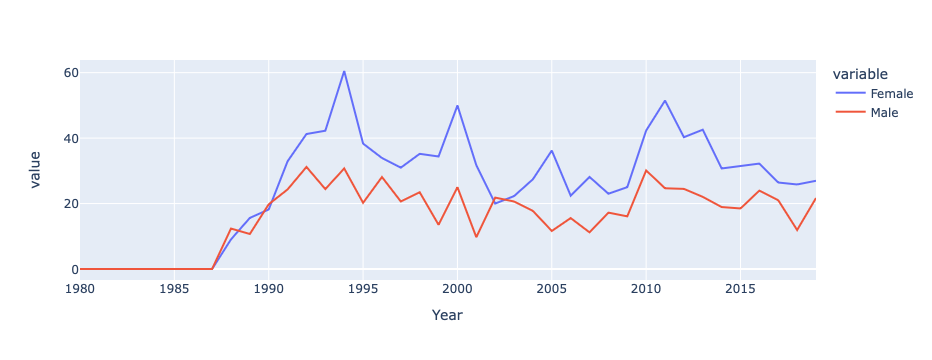

In [9]:
# Incidence
dfs = []

evaluation_timepoints_inc = np.arange(0, 40.0, 1.0) 

for timepoint in evaluation_timepoints_inc:
    timewindow = [timepoint, timepoint+1]
    result_df = incidence_calculator(datalist=datalist, agegroup=agegroup,timewindow=timewindow)
    result_df['timepoint'] = timepoint

    # Append the resulting dataframe to the list
    dfs.append(result_df)

# Concatenate all dataframes in the list into a single dataframe
inc_combined_df = pd.concat(dfs, ignore_index=True)

# Replace timepoint with years, gender with actual gender string
inc_combined_df['Year'] = inc_combined_df['timepoint'].map(timepoint_to_year)
inc_combined_df['Gender'] = inc_combined_df['Gender'].map(gender)

incidence_df = inc_combined_df.groupby(['Gender','Year']).agg(
            incidence=('incidence', 'mean')  # Average pop for each gender
        ).reset_index()

incidence_df['incidence'] = round(incidence_df['incidence'] * 1000, 3)

incidence_wide_df = incidence_df.pivot(index='Year', columns='Gender', values='incidence').reset_index()
incidence_wide_df.columns.name = None  # Remove the name of the columns index

px.line(data_frame=incidence_wide_df, x='Year', y=['Female','Male'])

/var/tmp/ipykernel_5083/1468745780.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



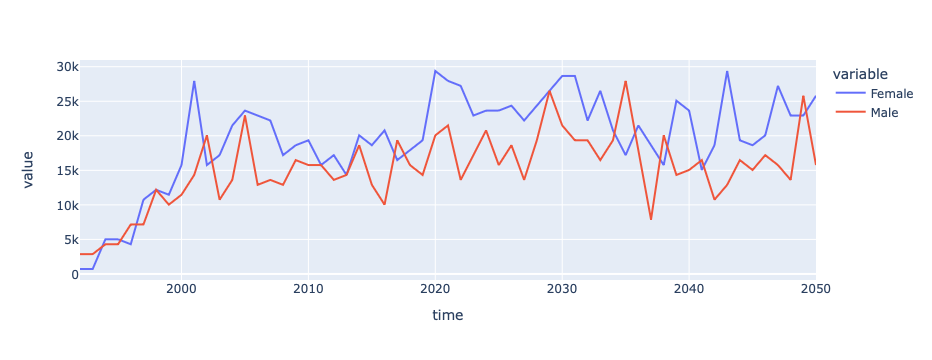

In [10]:
# HIV deaths
df = datalist['etable']
normal_deaths = df[df.eventname == 'aidsmortality']
normal_deaths['time'] = normal_deaths['eventtime'].astype(int)

no_deaths_gender = normal_deaths.groupby(['p1gender','time']).agg(no_deaths = ('p1ID', 'size')).reset_index()

# Replace timepoint with years, gender with actual gender string
no_deaths_gender['time'] = no_deaths_gender['time'].map(timepoint_to_year)
no_deaths_gender['p1gender'] = no_deaths_gender['p1gender'].map(gender)

no_deaths_gender['no_deaths_actual'] = no_deaths_gender['no_deaths']*716540/1000

no_deaths_gender_wide_df = no_deaths_gender.pivot(index='time', columns='p1gender', values='no_deaths_actual').reset_index()

px.line(data_frame=no_deaths_gender_wide_df, x='time', y=['Female','Male'])

/var/tmp/ipykernel_674819/513533479.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



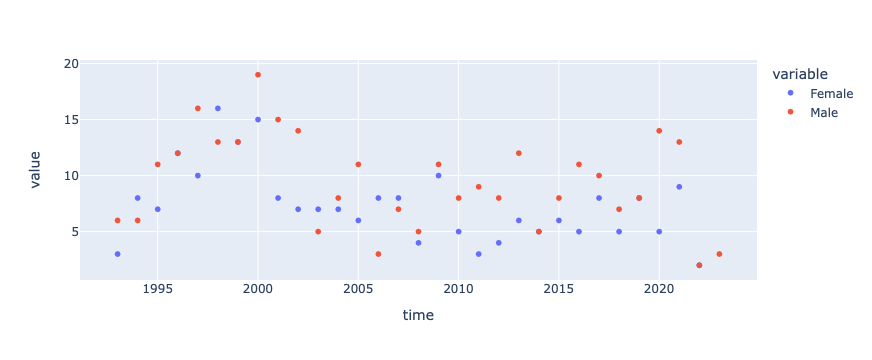

In [10]:
# HIV infections/transmissions
df = datalist['etable']
normal_deaths = df[df.eventname == 'transmission']
normal_deaths['time'] = normal_deaths['eventtime'].astype(int)

no_deaths_gender = normal_deaths.groupby(['p1gender','time']).agg(no_deaths = ('p1ID', 'size')).reset_index()

# Replace timepoint with years, gender with actual gender string
no_deaths_gender['time'] = no_deaths_gender['time'].map(timepoint_to_year)
no_deaths_gender['p1gender'] = no_deaths_gender['p1gender'].map(gender)

no_deaths_gender['no_deaths_actual'] = no_deaths_gender['no_deaths']#*716540/1000

no_deaths_gender_wide_df = no_deaths_gender.pivot(index='time', columns='p1gender', values='no_deaths_actual').reset_index()

px.scatter(data_frame=no_deaths_gender_wide_df, x='time', y=['Female','Male'])

/var/tmp/ipykernel_674819/4267516438.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



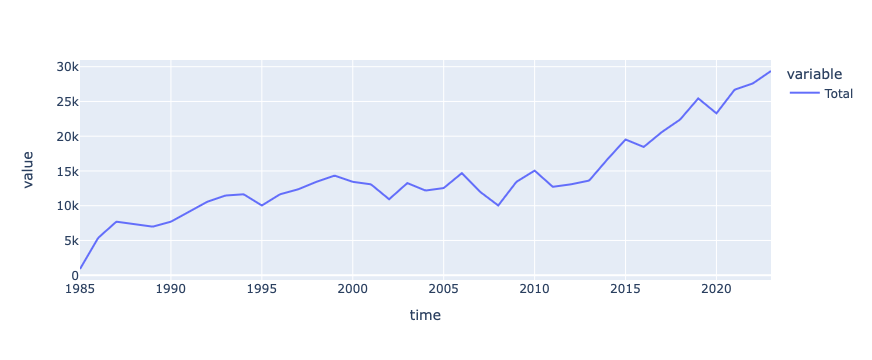

In [11]:
# births

df = datalist['etable']
newborns = df[df.eventname == '(childborn)']
newborns['time'] = newborns['eventtime'].astype(int)

newborns_gender = newborns.groupby(['p1gender','time']).agg(no_births = ('p1ID', 'size')).reset_index()

# Replace timepoint with years, gender with actual gender string
newborns_gender['time'] = newborns_gender['time'].map(timepoint_to_year)
newborns_gender['p1gender'] = newborns_gender['p1gender'].map(gender)

newborns_gender['no_births_actual'] = newborns_gender['no_births']*716540/4000

newborns_gender_wide_df = newborns_gender.pivot(index='time', columns='p1gender', values='no_births_actual').reset_index()
newborns_gender_wide_df['Total'] = newborns_gender_wide_df['Female'] + newborns_gender_wide_df['Male']

px.line(data_frame=newborns_gender_wide_df, x='time', y=['Total'])

# Extras

In [ ]:
# for name, df in datalist.items():
#     df.to_csv(f'{name}.csv', index=False)

# datalist = {}
# datalist['ptable'] = pd.read_csv('ptable.csv')
# datalist['rtable'] = pd.read_csv('rtable.csv')
# datalist['etable'] = pd.read_csv('etable.csv')
# datalist['ttable'] = pd.read_csv('ttable.csv')
# datalist['itable'] = pd.read_csv('itable.csv')
# datalist['itable'] = pd.read_csv('itable.csv')
# datalist['vltable'] = pd.read_csv('vltable.csv')

In [ ]:
cfg = { }
cfg["population.nummen"] = 200
cfg["population.numwomen"] = 200
cfg["population.simtime"] = 40
cfg["population.msm"] = 'yes'
cfg["hsv2seed.time"] = 0
cfg["periodiclogging.interval"] = 1
cfg["periodiclogging.starttime"] = 0
cfg["formation.hazard.type"] = "agegapry"
cfg["formation.hazard.agegapry.maxageref.diff"] = 1
cfg["syncrefyear.interval"] = 1


# For example, suppose that we already have some configuration settings in cfg, but that 
# we’d like to set the CD4 threshold for treatment to 500 at simulation time 5, and to inf 
# at simulation time 10. We’d first create a dictionary for the first intervention event

iv1 = { }
iv1["time"] = 20
iv1["monitoring.cd4.threshold"] = 350

iv2 = { }
iv2["time"] = 25
iv2["monitoring.cd4.threshold"] = 'inf' # The CD4 count normal range is 500 to 1500 cell/mm^3 

iv = [iv1, iv2]

res = simpact.run(cfg, "data", seed=1423, interventionConfig=iv)

In [ ]:
simpact.showConfiguration(cfg)

In [ ]:
simpact.setSimulationPrefix("maxart")

In [ ]:
cfg = { "population.nummen": 150000,
        "population.numwomen": 150000,
        "population.eyecap.fraction": 0,
        "population.maxevents": 1,
        "facilities.randomization": "${SIMPACT_DATA_DIR}/maxart-randomization-fake_1.csv" }

In [ ]:
simpact.showConfiguration(cfg)

In [ ]:
res = simpact.run(cfg,'data',seed=425199414)

In [ ]:
persons = pd.read_csv("data/maxart-2024-02-19-14-16-49_28492_J5J1tzdX-personlog.csv")

In [ ]:
plt.figure(1, figsize=(8,8))
plt.hist2d(persons["XCoord"], persons["YCoord"], bins=100, norm=matplotlib.colors.LogNorm());
plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()

In [ ]:
cfg = { "population.nummen": 2000,
        "population.numwomen": 2000,
        "population.eyecap.fraction": 0.015,
        "facilities.randomization": "${SIMPACT_DATA_DIR}/maxart-randomization-fake_1.csv" }